# Лабораторная работа №9: Кластеризация

### Каткова Полина


0. Найти датасет для кластеризации, временно убираем метки классов.

Ссылка: https://www.kaggle.com/deepu1109/star-dataset
        
Колонки:

Temperature - температура в К

Luminosity(L/Lo) - яркость

Radius(R/Ro) - радиус

Absolute magnitude(Mv) - абсолютная магнитуда

Star type - тип (0 -> Brown Dwarf 1-> Red Dwarf 2 -> White Dwarf 3-> Main Sequence 4 -> Supergiant 5 -> Hypergiant)

Star color - цвет

Spectral Class - спектральный класс

In [68]:
import pandas as pd
import numpy as np
import sklearn

In [69]:
#загружаем 
df1 = pd.read_csv("stars.csv")
print( df1.shape )
df1.head( 2 )

(240, 7)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.0024,0.1700,16.12,0,Red,M
1,3042,0.0005,0.1542,16.60,0,Red,M


In [70]:
#удаляем метки
df2 = df1["Star type"]
df = df1.drop('Star type', axis = 1)

1. Производим иерархическую агломеративную кластеризацию (scipy.cluster.hierarchy), строим график-дендрограмму (hierarchy.dendrogram)

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [72]:
#преобразуем категориальные колонки в бинарные 
df = pd.get_dummies(df, drop_first = True)
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color_Blue,Star color_Blue White,Star color_Blue white,Star color_Blue white,Star color_Blue-White,Star color_Blue-white,...,Star color_Yellowish White,Star color_white,Star color_yellow-white,Star color_yellowish,Spectral Class_B,Spectral Class_F,Spectral Class_G,Spectral Class_K,Spectral Class_M,Spectral Class_O
0,3068,0.002400,0.1700,16.12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
236,30839,834042.000000,1194.0000,-10.63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
237,8829,537493.000000,1423.0000,-10.73,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238,9235,404940.000000,1112.0000,-11.23,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


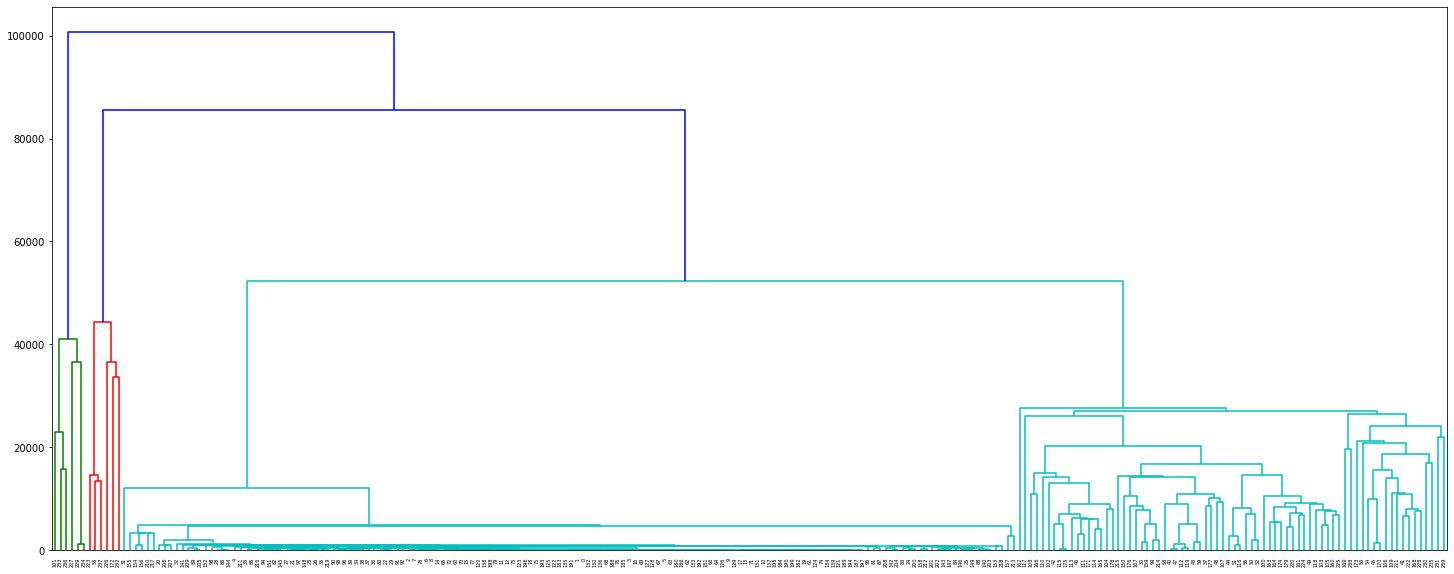

In [73]:
# строим дендрограмму
Z = linkage(df)
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

2. На том же датасете производим кластеризацию, используя любой другой метод кластеризации (пока с произвольными гиперпараметрами)

In [74]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [75]:
# кластеризация с помощью KMeans
model = KMeans(n_clusters=5)
pred = model.fit(df)
pred

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [76]:
#выводим метрики
print('ARI ', metrics.adjusted_rand_score(df2, pred.labels_))
print('AMI ', metrics.adjusted_mutual_info_score(df2, pred.labels_))
print('Completeness ', metrics.completeness_score(df2, pred.labels_))
print('V-measure', metrics.v_measure_score(df2, pred.labels_))

ARI  0.19188818712091926
AMI  0.304545575225044
Completeness  0.5617673625687323
V-measure 0.4100706033817607


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


3. Произвести оптимизацию гиперпараметров кластеризации (либо иерархической модели из п. 1, либо иной модели из п. 2, на ваш выбор; в случае иерархической кластеризации из п. 1 гиперпараметр — пороговое расстояние между центроидами, являющееся границей разбиения на кластеры). Оптимизацию производим, используя одну из метрик качества кластеризации, для которых нам понадобится информация об исходных метках класса: Adjusted Rand Index (ARI), Adjusted Mutual Information (AMI), Гомогенность, полнота, V-мера.

In [77]:
import matplotlib.pylab as plt

In [78]:
def find_cluster(n_clusters, kmeans):
    kmeans.set_params(n_clusters=n_clusters)
    labels = kmeans.fit_predict(df)
    score = completeness_score(df2, labels)
    return score

In [79]:
#считвем completeness_score для различного количества кластеров
model = KMeans()
scores = []
n_clusters = np.arange(2,25)
for i in n_clusters:
    tmp = find_cluster(i, model)
    scores.append(tmp)
    print(i, ': ', scores[i-2])

2 :  0.5978974098854491
3 :  0.6227767672408132
4 :  0.584333913576543
5 :  0.5617673625687322
6 :  0.5207075198305882
7 :  0.49532433622476507
8 :  0.4808178334037903
9 :  0.47640341420274024
10 :  0.4751026502080731
11 :  0.47090393631916105
12 :  0.4663873197050904
13 :  0.4578253098634651
14 :  0.4632719176675955
15 :  0.4530061727891129
16 :  0.4645871969684634
17 :  0.4607551861260469
18 :  0.44277193878198945
19 :  0.4500292600392253
20 :  0.4503805975147473
21 :  0.4420528030579847
22 :  0.4336906775437986
23 :  0.4313231292979356
24 :  0.43484748645879956


In [80]:
#находим наилучшую метрику и количество кластеров
print('Best number of clustres: ', np.argmax(scores) + 2)
print('Highest score: ', np.max(scores))

Best number of clustres:  3
Highest score:  0.6227767672408132


Text(0, 0.5, 'completeness score')

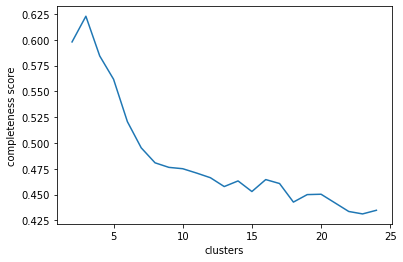

In [81]:
plt.plot( n_clusters, scores)
plt.xlabel('clusters')
plt.ylabel('completeness score')

4. Используя алгоритм/модель из п. 2 произвести оптимизацию гиперпараметра количества кластеров, используя "правило локтя" (анализируем график силуэта)

In [82]:
from sklearn.metrics import silhouette_score 

In [83]:
scores = []
n_clusters = np.arange(2, 25) 

In [84]:
def find_silhouette(n_clusters, kmeans):
    for i in n_clusters:
        kmeans.set_params(n_clusters=i) 
        labels = kmeans.fit_predict(df) 
        score = silhouette_score(df, labels)  
        scores.append(score)
    return scores

In [85]:
#считаем silhouette_score для различного числа кластеров
find_silhouette(n_clusters, KMeans())

[0.7462805697796473,
 0.8102645811530503,
 0.8063423155896591,
 0.808755803080652,
 0.803079403714893,
 0.7976275775732894,
 0.7931628561165575,
 0.7861378966846133,
 0.7870741894796998,
 0.7883237561499926,
 0.6359822486066637,
 0.6339413614570264,
 0.6154060818918753,
 0.6289486959236588,
 0.6207837610285687,
 0.6280463138777255,
 0.6247395970397988,
 0.6378393043226583,
 0.6118211204299265,
 0.6289621772380102,
 0.6210488845367849,
 0.6294377948056515,
 0.6261786293110669]

Text(0.5, 1.0, 'График силуэта')

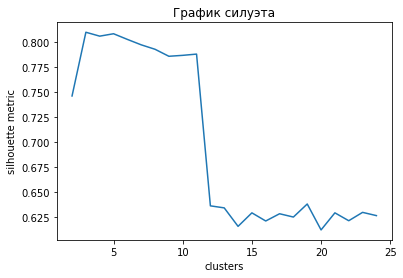

In [86]:
#выводим график
plt.xlabel('clusters')
plt.ylabel('silhouette metric')
plt.plot( n_clusters, scores)
plt.title('График силуэта')
#из графика видно, что наилучшее количество сластеров - 3

In [87]:
#строим наилучшую модель
model = KMeans(n_clusters=3)
pred = model.fit(df)

In [88]:
#выводим метрики для наилучшей модели
print('ARI ', metrics.adjusted_rand_score(df2, pred.labels_))
print('AMI ', metrics.adjusted_mutual_info_score(df2, pred.labels_))
print('Completeness ', metrics.completeness_score(df2, pred.labels_))
print('V-measure', metrics.v_measure_score(df2, pred.labels_))
print('Homogenity', metrics.homogeneity_score(df2, pred.labels_))
print('Silhouette', metrics.silhouette_score(df, pred.labels_))

ARI  0.19286285097679795
AMI  0.2608199962176728
Completeness  0.6227767672408131
V-measure 0.37689690658807473
Homogenity 0.270213372615569
Silhouette 0.8102645811530503


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
